<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This is supplemental practice you can finish to get more familliar with K-Means (ie: not required).  This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [80]:
#Importing necesscary Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
#Importing dataset
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


In [82]:
#Dropping Unnamed: 0 Column
df.drop(columns = ['Unnamed: 0'], inplace = True)
df['Pu238'] = df['Pu238'].apply(lambda a : float(a))
df['Pu239'] = df['Pu239'].apply(lambda a : float(a))
df['Pu240'] = df['Pu240'].apply(lambda a : float(a))
df['Pu241'] = df['Pu241'].apply(lambda a : float(a))

###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


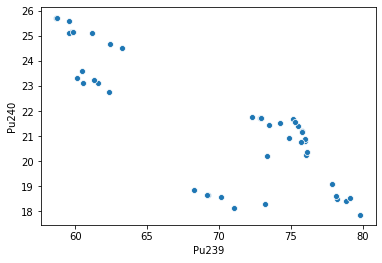

In [102]:
#Selecting Pu 239 and Pu240 as features and plotting them
features = ["Pu239", "Pu240"]
X = df[features]
#Visualizing data
sns.scatterplot(x = X["Pu239"], y = X["Pu240"] )

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [100]:
#Initializing kMeans model
km = KMeans(n_clusters = 3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Assign clusters assignments (predictions) back to the original dataframe

In [85]:
#Prediction of classes
pred = km.predict(X)
pred

array([2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2,
       0], dtype=int32)

In [89]:
X['cluster'] = pred

/Users/antonypaulson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
centroid = X.groupby('cluster').mean()

### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

<Figure size 504x504 with 0 Axes>

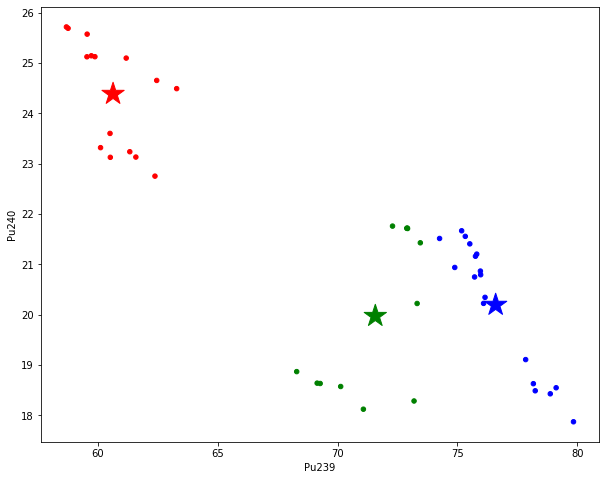

In [91]:
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = X['cluster'].map(lambda p: colors[p])

ax = X.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
);

centroid.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [92]:
#Scaling the data
ss = StandardScaler()
X_sc = ss.fit_transform(X)

In [93]:
#Prediction of classes
km.fit(X_sc)
pred1 = km.predict(X_sc)
pred1

array([1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1,
       0], dtype=int32)

In [96]:
#clusters
X['cluster1'] = pred1

# inding centroids of each cluster
centroid1 = X.groupby('cluster1').mean()
centroid1

/Users/antonypaulson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pu239,Pu240,cluster
cluster1,,,
0,60.633933,24.387533,0
1,76.593000,20.194833,2
2,71.573167,19.973917,1


<Figure size 504x504 with 0 Axes>

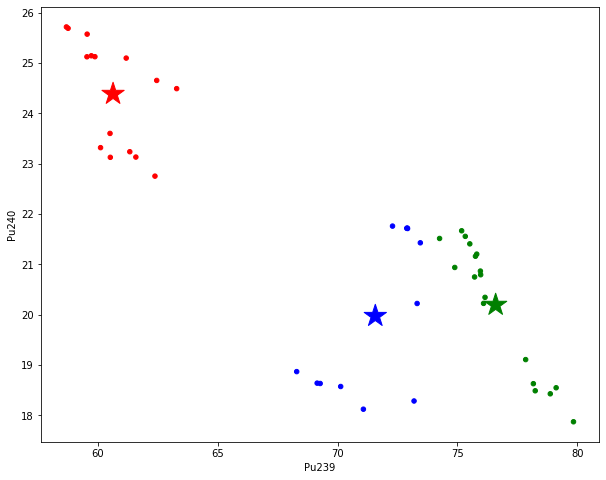

In [97]:
#Plotting
plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = X['cluster1'].map(lambda p: colors[p])

ax = X.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
);

centroid1.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [103]:
#Silhouette score check. 
s = silhouette_score(X_sc, km.labels_)
print(f'The silhouette score of the scaled X data is {s}')

The silhouette score of the scaled X data is 0.6193505157371144
